In [28]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt
%matplotlib inline

admissions = pd.read_csv("telecom_sample.csv")
admissions.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,Female,55,2,111.22,6956.08,Month-to-month,No
1,2,Male,33,21,75.53,5692.23,Month-to-month,Yes
2,3,Female,30,51,94.74,4839.18,Month-to-month,No
3,4,Female,20,5,75.43,6706.95,Month-to-month,No
4,5,Male,53,47,70.88,3958.48,Month-to-month,Yes


In [29]:
#data preprocess is the first step!
admissions = admissions.dropna()
df=admissions

In [30]:
df['Churn'] = df.Churn.apply(lambda x: 0 if x == 'No' else 1)
df['Gender'] = df.Gender.apply(lambda x: 0 if x == 'Female' else 1)

In [31]:
df

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,0,55,2,111.22,6956.08,Month-to-month,0
1,2,1,33,21,75.53,5692.23,Month-to-month,1
2,3,0,30,51,94.74,4839.18,Month-to-month,0
3,4,0,20,5,75.43,6706.95,Month-to-month,0
4,5,1,53,47,70.88,3958.48,Month-to-month,1
...,...,...,...,...,...,...,...,...
995,996,1,25,55,75.56,1067.28,Two year,0
996,997,1,45,11,101.68,6703.63,One year,0
997,998,0,28,59,60.80,1447.63,One year,0
998,999,1,68,33,24.60,3932.29,Month-to-month,0


In [32]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [33]:
df=df.join(pd.get_dummies(df['Contract'], prefix = 'Contract'))

In [34]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,55,2,111.22,6956.08,Month-to-month,0,True,False,False
1,2,1,33,21,75.53,5692.23,Month-to-month,1,True,False,False
2,3,0,30,51,94.74,4839.18,Month-to-month,0,True,False,False
3,4,0,20,5,75.43,6706.95,Month-to-month,0,True,False,False
4,5,1,53,47,70.88,3958.48,Month-to-month,1,True,False,False


In [35]:
# Remove the temp_F column.
df.drop('Contract', axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   int64  
 1   Gender                   1000 non-null   int64  
 2   Age                      1000 non-null   int64  
 3   Tenure                   1000 non-null   int64  
 4   MonthlyCharges           1000 non-null   float64
 5   TotalCharges             1000 non-null   float64
 6   Churn                    1000 non-null   int64  
 7   Contract_Month-to-month  1000 non-null   bool   
 8   Contract_One year        1000 non-null   bool   
 9   Contract_Two year        1000 non-null   bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 57.7 KB


In [37]:
df.Churn.unique(), df.Churn.value_counts()

(array([0, 1], dtype=int64),
 Churn
 0    513
 1    487
 Name: count, dtype: int64)

<Axes: xlabel='Churn'>

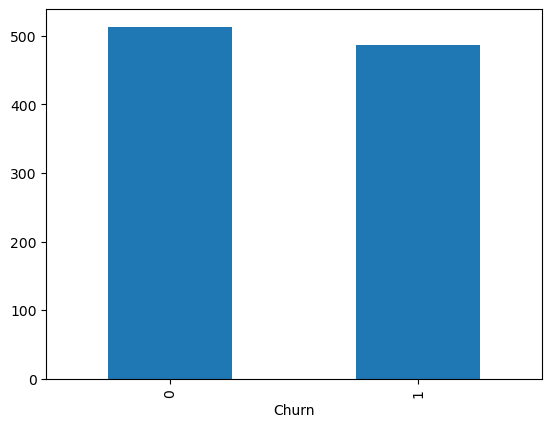

In [38]:
df.Churn.value_counts().plot(kind = 'bar')

In [39]:
df.keys()

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

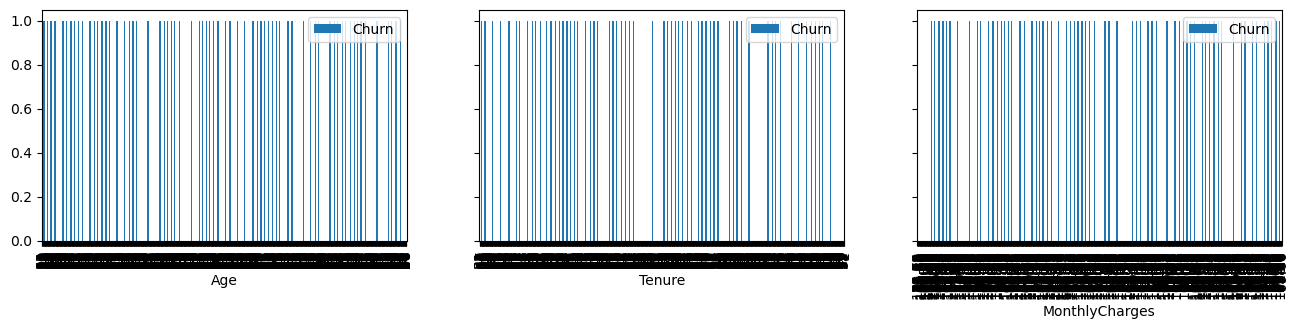

In [40]:
feature_cols = ['Age', 'Tenure', 'MonthlyCharges']
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df.plot(kind='bar', x=feature, y='Churn', ax=axs[index], figsize=(16, 3))

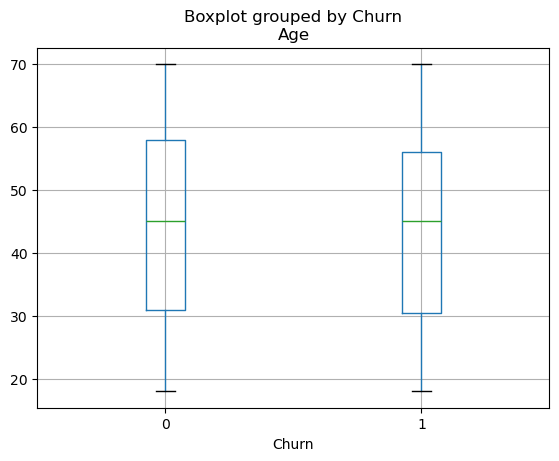

In [41]:
df.boxplot(column='Age', by='Churn');

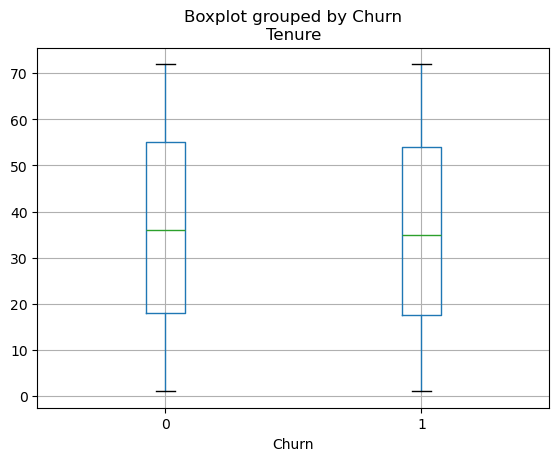

In [42]:
df.boxplot(column='Tenure', by='Churn');

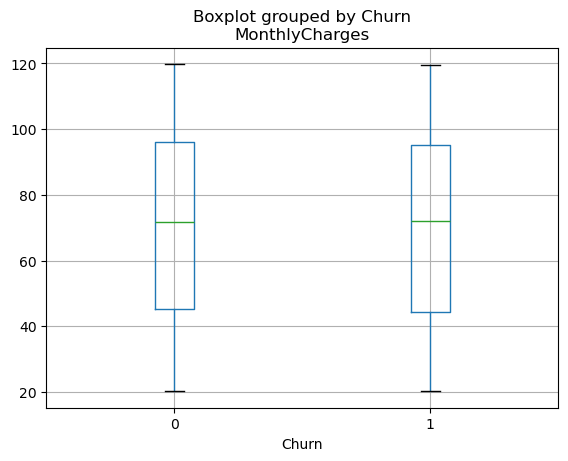

In [43]:
df.boxplot(column='MonthlyCharges', by='Churn');

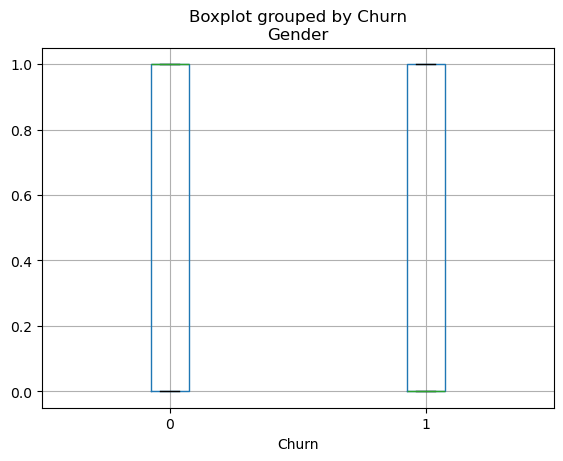

In [44]:
df.boxplot(column='Gender', by='Churn');

In [45]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,55,2,111.22,6956.08,0,True,False,False
1,2,1,33,21,75.53,5692.23,1,True,False,False
2,3,0,30,51,94.74,4839.18,0,True,False,False
3,4,0,20,5,75.43,6706.95,0,True,False,False
4,5,1,53,47,70.88,3958.48,1,True,False,False


<Axes: xlabel='Churn'>

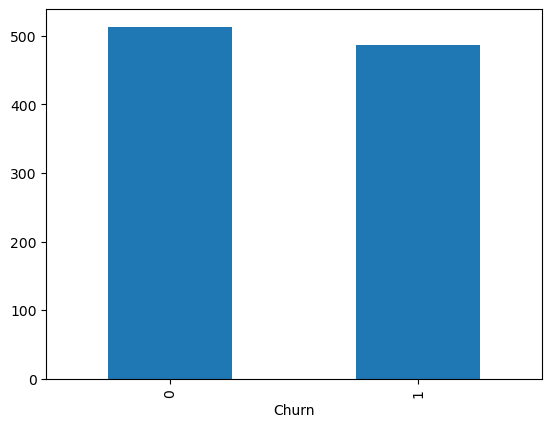

In [46]:
df.Churn.value_counts().plot.bar()

<Axes: xlabel='Age'>

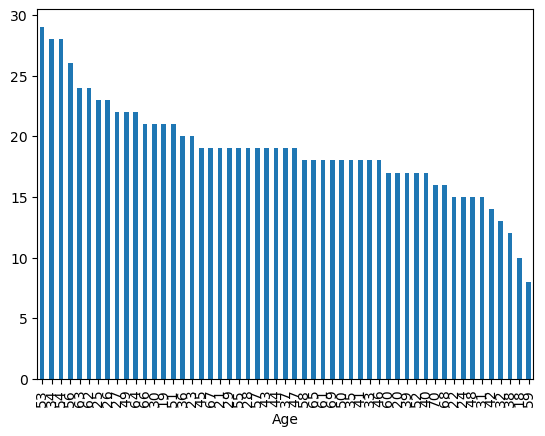

In [47]:
df.Age.value_counts().plot.bar()

In [48]:
df.MonthlyCharges.unique()

array([111.22,  75.53,  94.74,  75.43,  70.88,  37.52,  66.43,  73.83,
       113.75,  45.86,  53.82, 107.15, 109.38,  57.18,  88.57,  94.97,
        72.47,  79.99,  94.06,  21.02, 106.54,  67.6 , 104.26, 118.28,
        68.61,  60.15, 115.84, 115.44, 109.65, 105.61,  99.58, 111.14,
        77.3 ,  70.02,  77.15, 102.95,  69.06,  74.65,  85.62,  30.75,
        50.37, 113.32, 109.35,  97.76,  39.5 , 118.63,  57.62, 110.35,
        45.23,  50.85,  34.3 ,  63.57, 104.03,  92.6 ,  48.31,  90.36,
        68.86,  84.43, 100.82, 103.36,  99.16,  99.84, 101.91, 118.3 ,
        85.4 ,  80.39,  37.04,  34.11,  40.03,  53.08,  27.49,  76.31,
        50.22,  49.21,  72.45,  30.01,  45.48,  87.96, 102.18,  88.23,
       113.1 , 103.54,  76.58,  73.9 ,  33.34, 113.55,  67.59,  52.46,
        88.48,  56.97,  43.38,  37.95,  46.73, 101.34,  24.45,  87.95,
        79.77, 113.25,  36.09,  28.89,  41.45,  96.69,  51.5 ,  61.19,
       109.52,  55.22,  72.63,  41.6 ,  51.61,  71.39,  23.71,  54.4 ,
      

In [49]:
df.TotalCharges.unique()

array([6956.08, 5692.23, 4839.18, 6706.95, 3958.48,  447.59, 5230.24,
       2658.84,  758.41, 4725.75,  797.33, 7119.84, 6535.09, 7603.01,
       7882.48, 1328.01, 1109.68, 6175.04,  290.27,  709.55, 4809.  ,
       5798.82, 3568.67, 1995.89, 1977.89, 5028.95, 6943.12, 2377.49,
       4451.34, 3507.96, 7229.1 , 1953.75, 2343.34, 6969.08, 2605.44,
       2342.79, 2528.69,  349.78, 4512.91, 3995.17, 3795.67, 1831.16,
       6950.99, 3686.45, 3239.78, 4077.14, 6178.52, 4589.64, 3395.38,
       4521.24,  424.23, 6649.5 , 3306.41, 2524.84, 3660.22, 5376.24,
       4421.62,  780.12, 7552.04, 3910.19, 3647.62, 4085.77,  325.26,
       1534.18, 2892.43, 2421.45, 7550.76, 5203.61, 5384.77, 7254.23,
       2533.86, 1127.26, 3228.91, 6759.  , 7967.27, 4349.87, 7204.81,
       5111.07, 7891.48,  361.54, 5631.54,  268.55, 4964.22, 3739.24,
       2052.2 , 6184.26, 6474.28, 4488.37, 2415.91, 1126.88, 3143.73,
       3799.75, 5452.08, 3684.7 , 2388.18, 3721.21, 7096.95, 2676.81,
       3285.43, 2955

In [50]:
df.Tenure.value_counts()

Tenure
9     23
21    21
65    20
55    20
14    20
      ..
49     8
53     7
61     6
66     5
6      5
Name: count, Length: 72, dtype: int64

In [51]:
df.corr()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
CustomerID,1.000000,0.007041,-0.008477,0.042854,-0.070124,-0.034867,-0.012028,-0.019832,-0.026546,0.046521
Gender,0.007041,1.000000,-0.013059,-0.037422,-0.017919,0.026089,-0.030643,-0.008679,0.015079,-0.006496
Age,-0.008477,-0.013059,1.000000,0.038315,0.000721,-0.024992,-0.010366,0.027620,0.048156,-0.076042
Tenure,0.042854,-0.037422,0.038315,1.000000,0.019109,0.031735,-0.003566,-0.023990,0.008604,0.015316
MonthlyCharges,-0.070124,-0.017919,0.000721,0.019109,1.000000,-0.003102,-0.013454,-0.019481,0.002218,0.017236
TotalCharges,-0.034867,0.026089,-0.024992,0.031735,-0.003102,1.000000,0.007935,-0.006415,0.026793,-0.020542
Churn,-0.012028,-0.030643,-0.010366,-0.003566,-0.013454,0.007935,1.000000,-0.015785,0.003833,0.011917
Contract_Month-to-month,-0.019832,-0.008679,0.027620,-0.023990,-0.019481,-0.006415,-0.015785,1.000000,-0.502596,-0.493652
Contract_One year,-0.026546,0.015079,0.048156,0.008604,0.002218,0.026793,0.003833,-0.502596,1.000000,-0.503733
Contract_Two year,0.046521,-0.006496,-0.076042,0.015316,0.017236,-0.020542,0.011917,-0.493652,-0.503733,1.000000


In [52]:
import seaborn as sns

<Axes: >

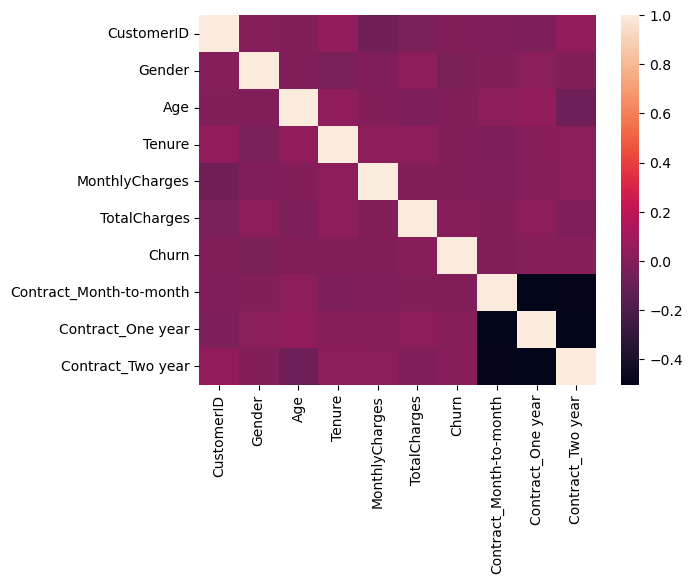

In [53]:
sns.heatmap(df.corr())